# 0104 Regression Models

Supervised Learning concerns the set of methods under which we train a ML Learning Model on labelled data. the result would then be a model that given a set of features $X$ (the same which we used to train it) is able to predict a value for the target variable $\hat{y}$

$$
\hat{y} = f(X)
$$

In general $X = \{x_1, \dots, x_n\}$ is a set of features such that

$$
\hat{y} = f(x_1, \dots , x_n)
$$

in the realm of Supervised ML there are two main classes of algorithms:
* Regression - the goal of the model is to predict a numeric value
* Classfication - the goal of the model is to predict a class

Here we will focus on regression methods

In [142]:
import pandas as pd
import tools
import warnings
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

warnings.simplefilter('ignore')

In [9]:
#!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('/home/giacomo_lini/MLOps/Coursera/azure/Azure_ML_Cloud/01_Create_ML_Models_in_Azure/data/daily-bike-share.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


here we have a table that contains the following columns

* Instant - unique row identifier
* dteday - Date of observation
* season - numerical encoded variable for season (1:winter, 2:spring, 3:summer, 4:fall)
* yr - year of the study (0 = 2011, 1= 2012)
* mnth - month (January to December 1 to 12)
* holiday - bianry value (was it a holiday)
* weekday - which day of the week it was (0: Sunday to 6: Saturday)
* workingday - was it a working day?
* weathersit: A categorical value indicating the weather situation (1:clear, 2:mist/cloud, 3:light rain/snow, 4:heavy rain/hail/snow/fog)
* temp: temperature in celsius (normalized)
* atemp: feelslike temp
* hum: humidity level (normalized)
* windspeed: wind speed (normalized)
* rentals: target variable, number of rentals on that day

In [10]:
# add a column for day (1 to 31)

bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head(32)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10


In [11]:
#take a look at the true (non encoded) numeric features

numeric_features = ['temp', 'atemp', 'hum', 'windspeed']

bike_data[numeric_features+['rentals']].describe()


,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


In [12]:
#how many nan do we have in the data?

bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
rentals       0
day           0
dtype: int64

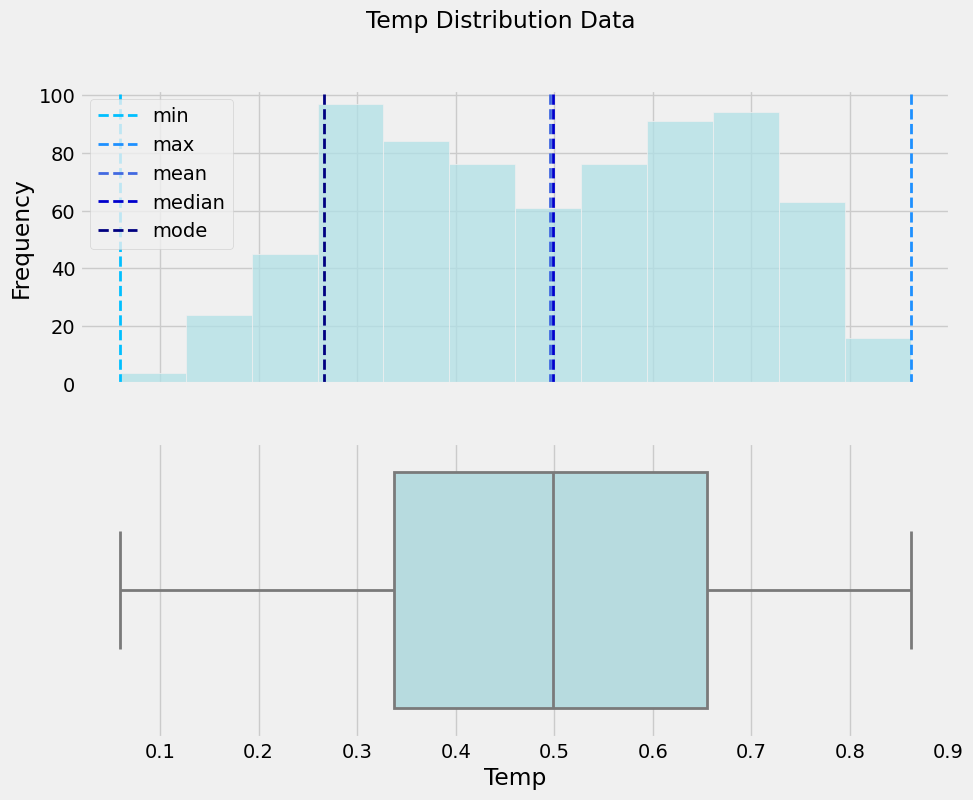

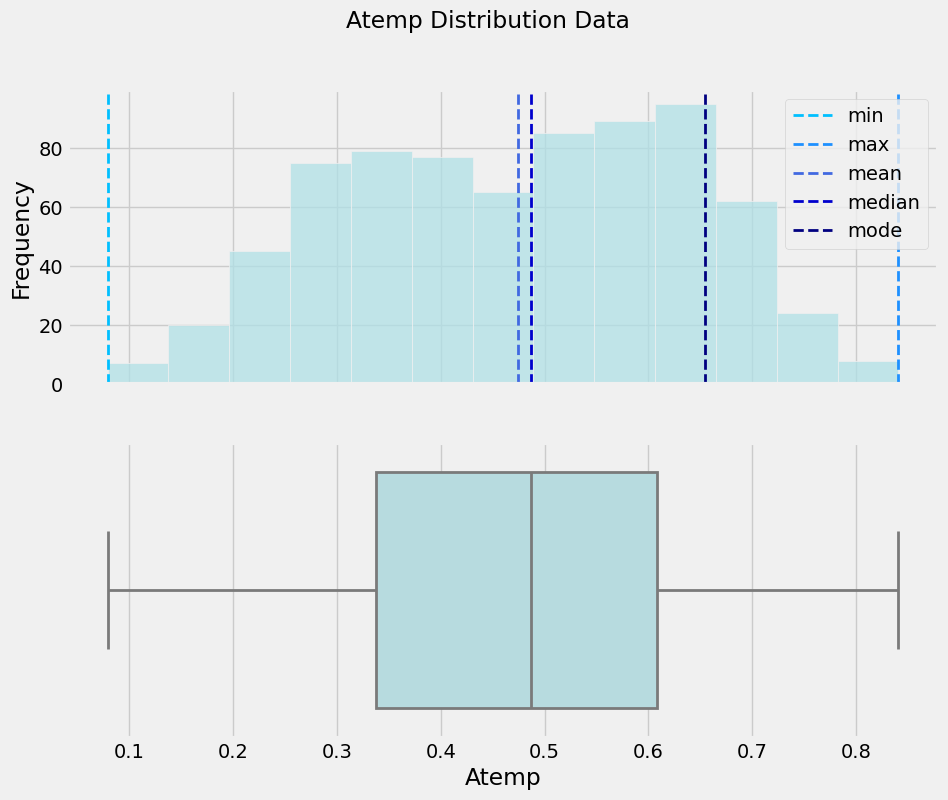

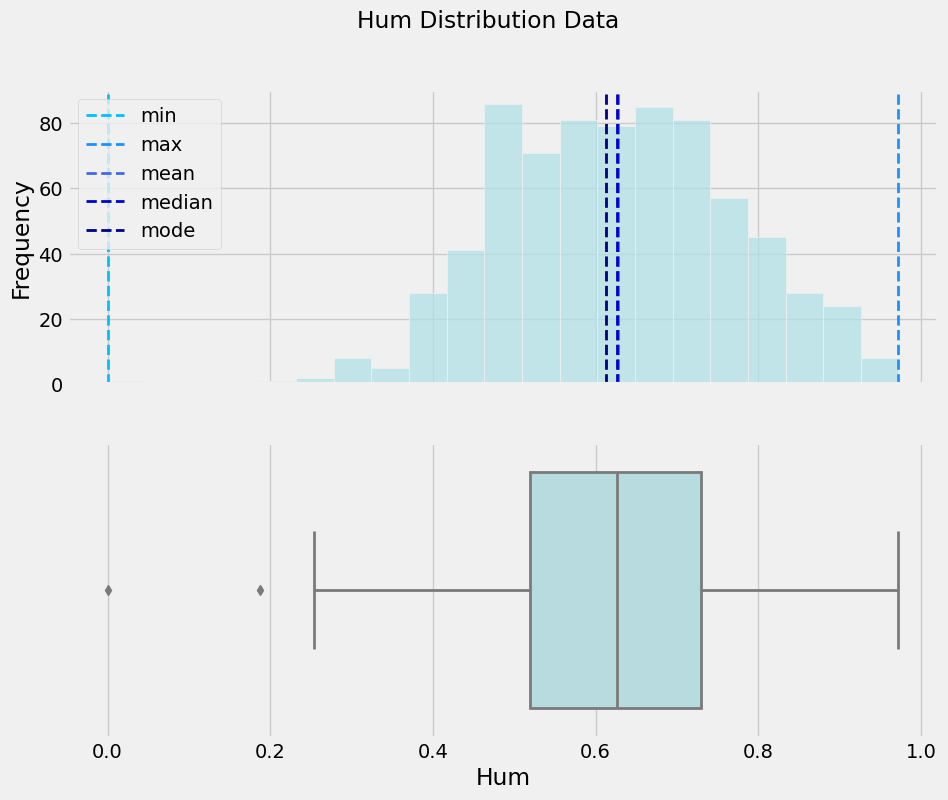

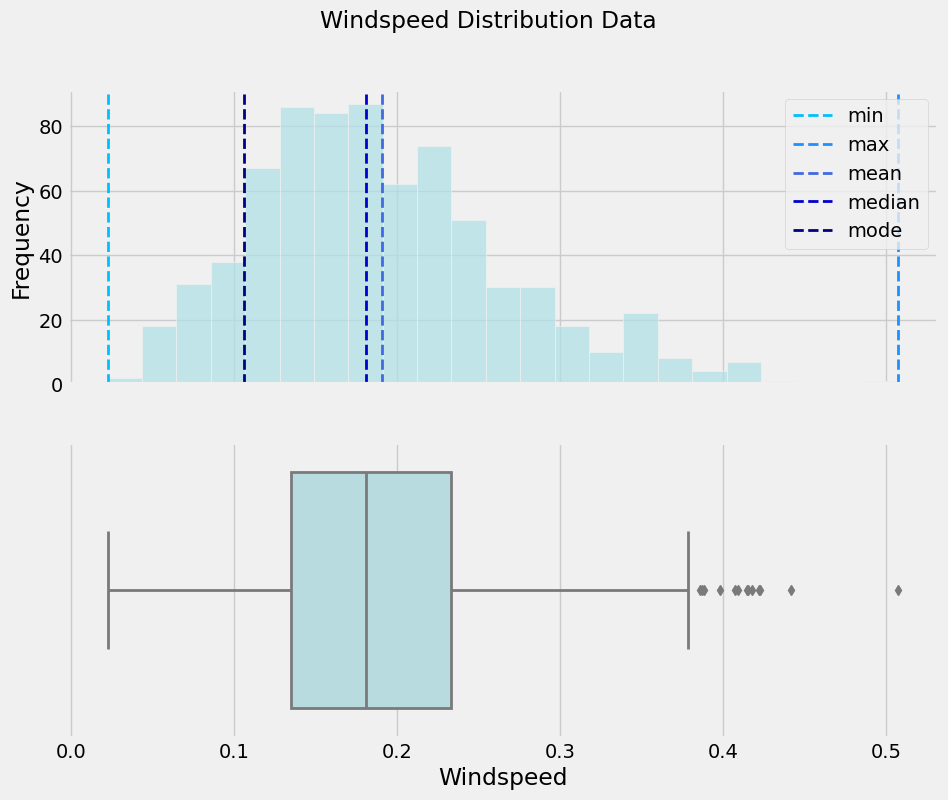

In [77]:
float_vars = bike_data.select_dtypes(include='float').columns.to_list()

for var in float_vars:
    fig= tools.show_distribution(bike_data, var)
    fig.show()


The distribution of rentals can also be visualized

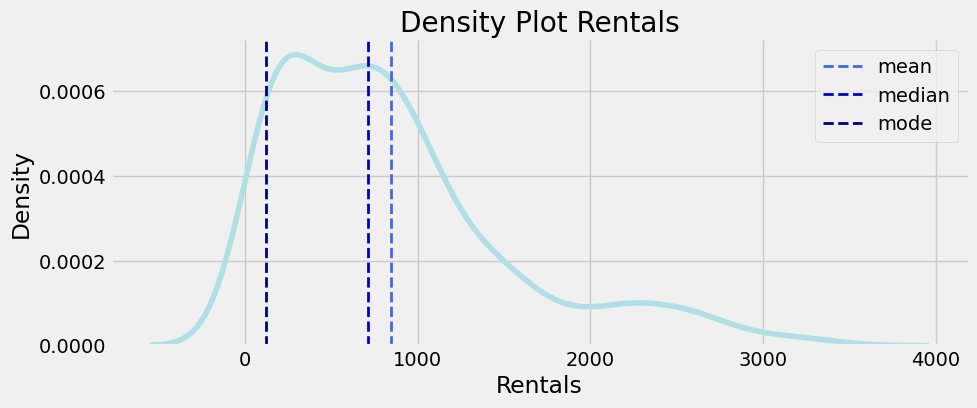

In [101]:
importlib.reload(tools) # did some update on the fly, reimport
fig = tools.show_density(bike_data, 'rentals')

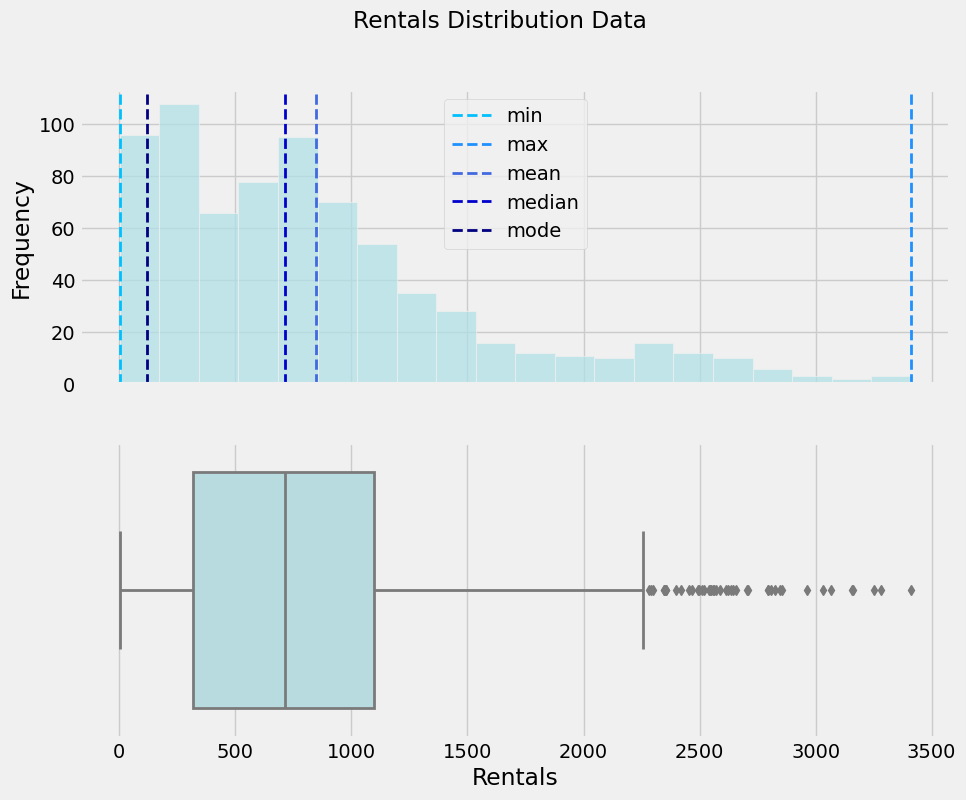

In [79]:
fig = tools.show_distribution(bike_data, 'rentals')

The distribution of categorical features can be explored as well

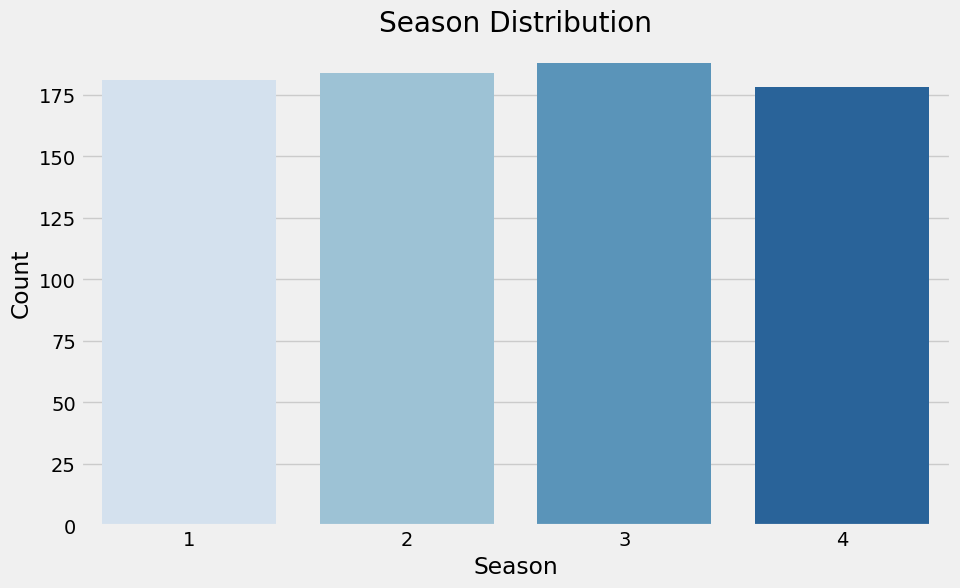

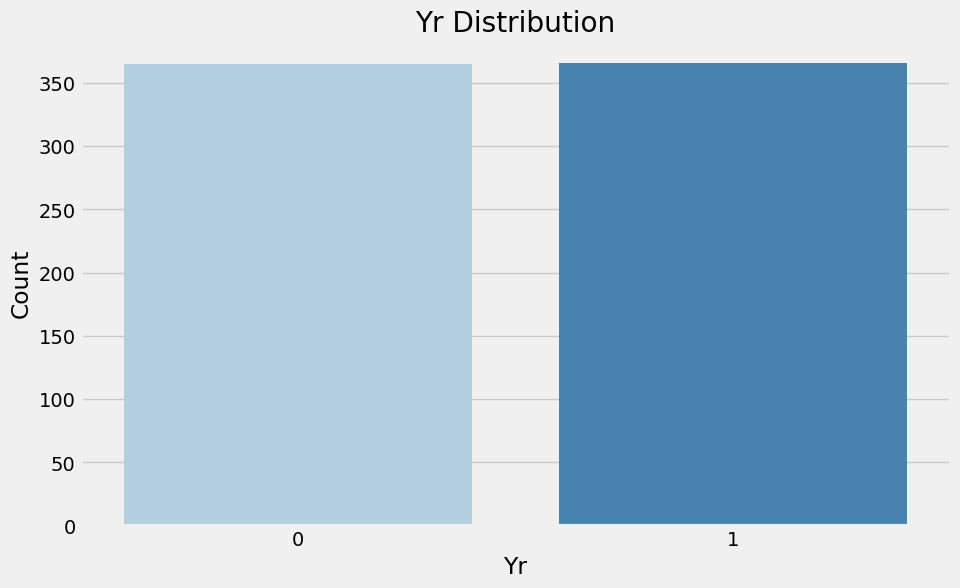

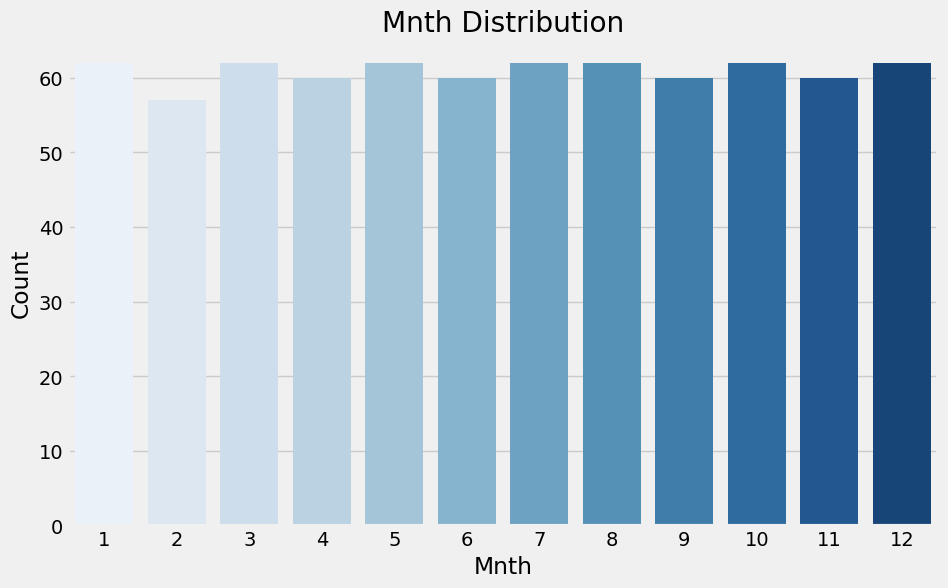

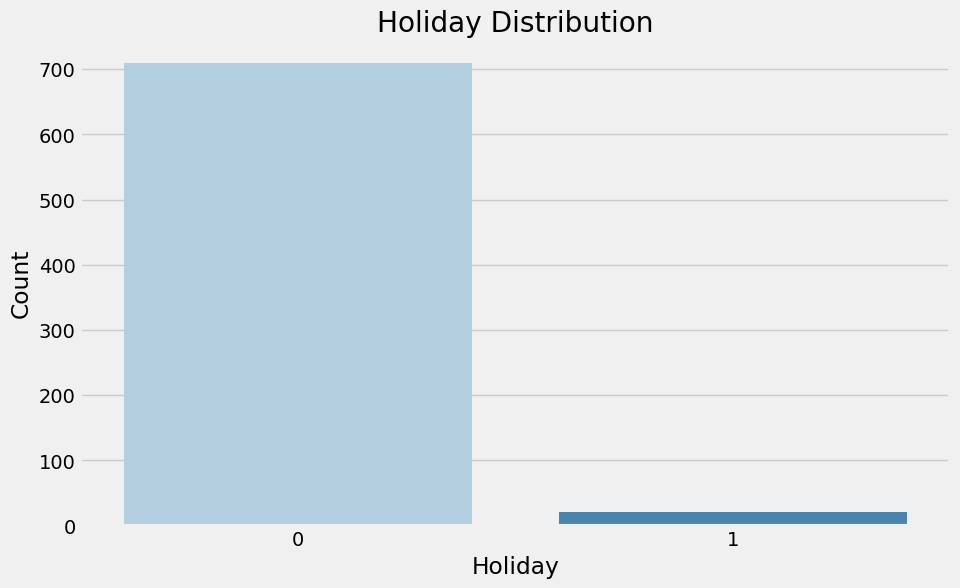

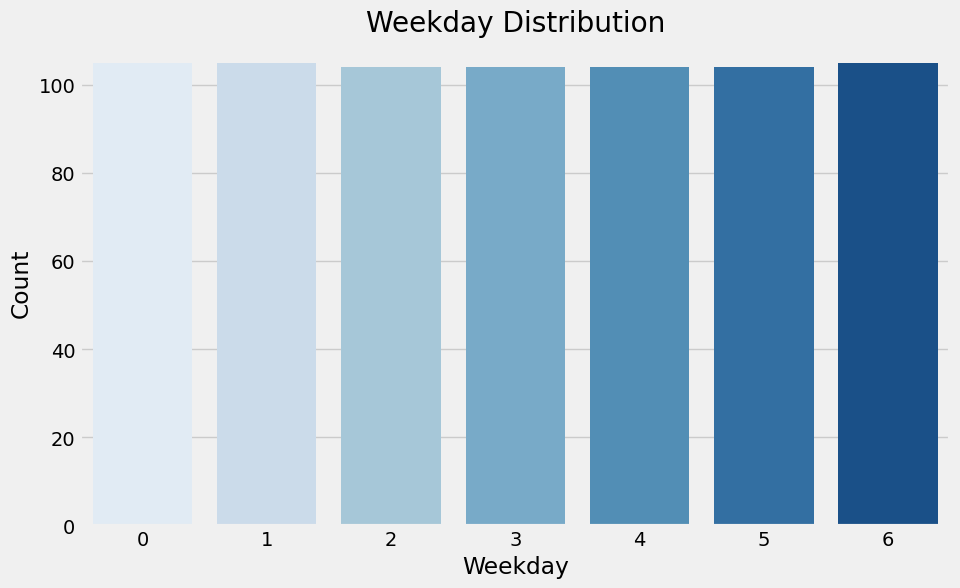

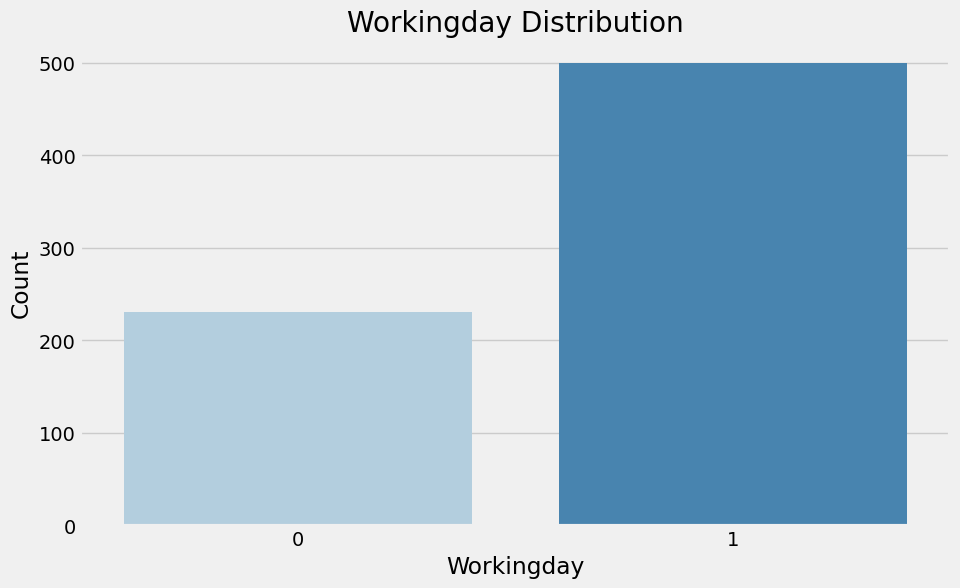

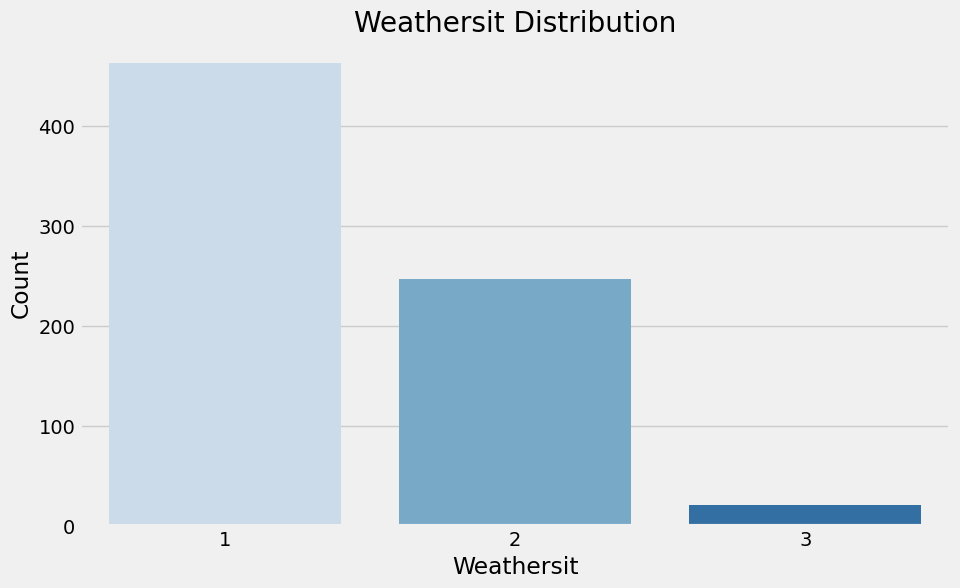

In [81]:
cat_var = [
'season',
'yr',
'mnth',
'holiday',
'weekday',
'workingday',
'weathersit'
]

for var in cat_var:
    fig = tools.show_distribution_cat_feature(df= bike_data, column = var)
    fig.show()

As one can see the distribution are more or less uniform with the exception of holidays, working days and wheather.

Now we can take a look at the correlations between the parameters and our target variable. We do so for the nuemeric features

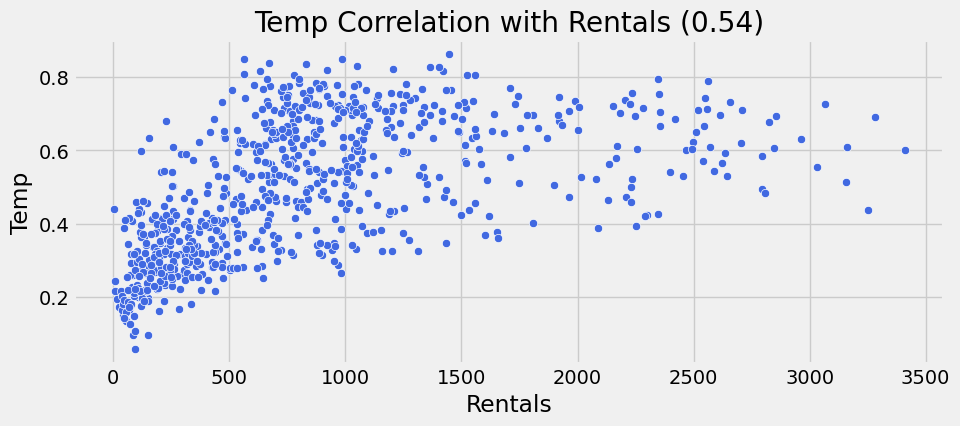

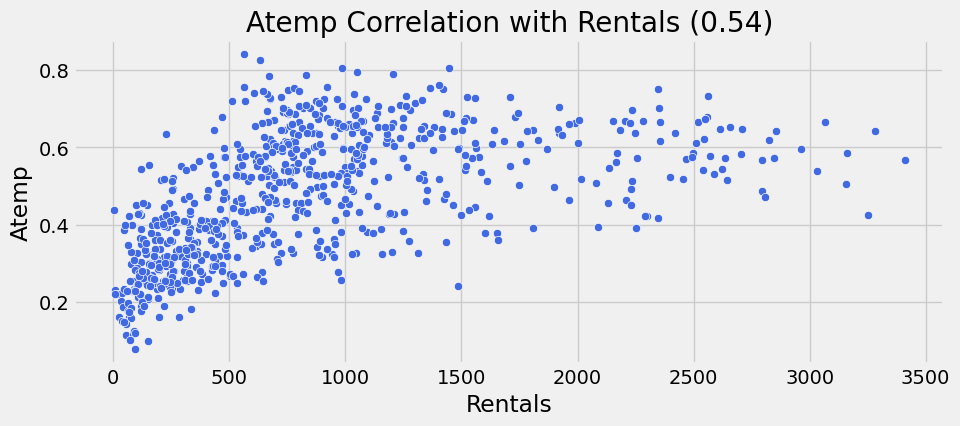

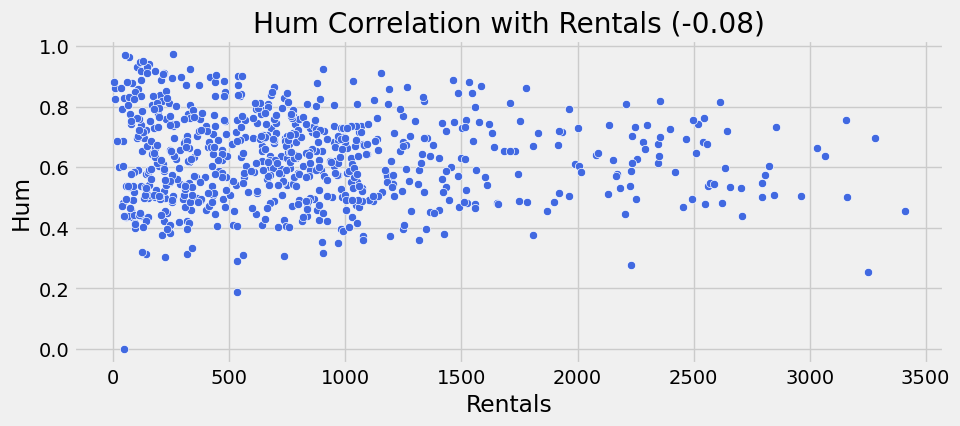

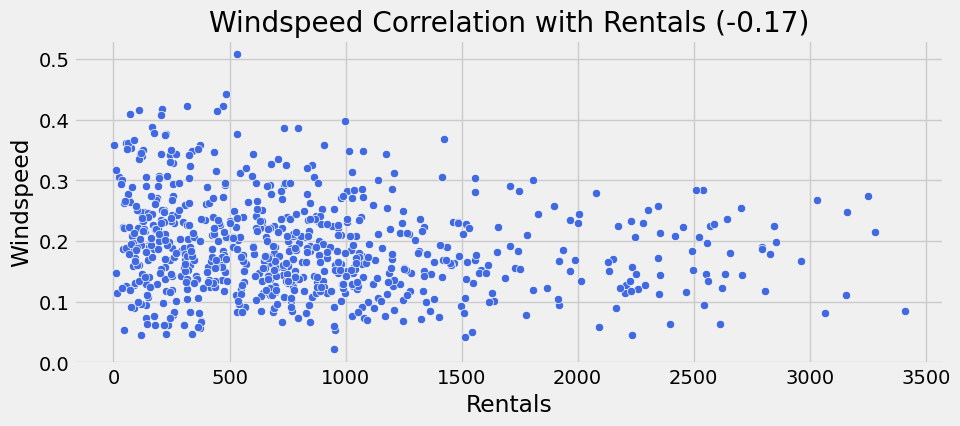

In [103]:
for var in float_vars:
    fig = tools.show_correlation_with_target(
        data=bike_data,
        target='rentals',
        column=var
    )
    fig.show()

something similar can be done also for the categorical features

In [117]:
cat_var

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [119]:
importlib.reload(tools)

<module 'tools' from '/home/giacomo_lini/MLOps/Coursera/azure/Azure_ML_Cloud/01_Create_ML_Models_in_Azure/tools.py'>

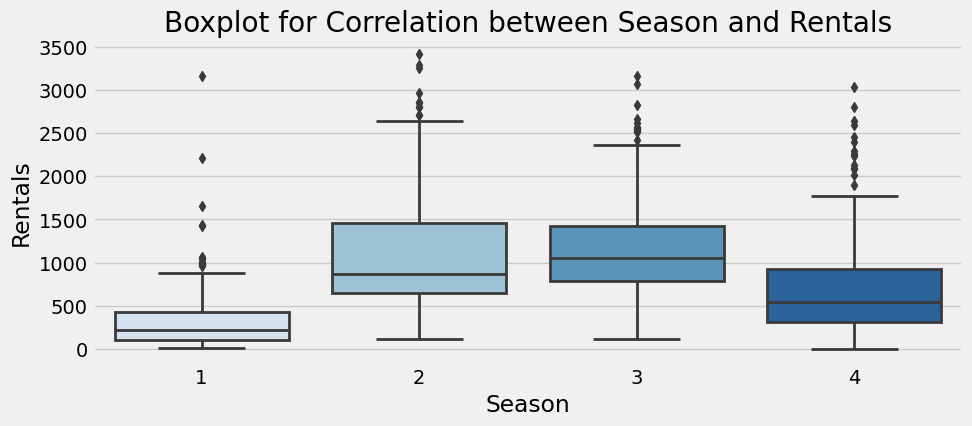

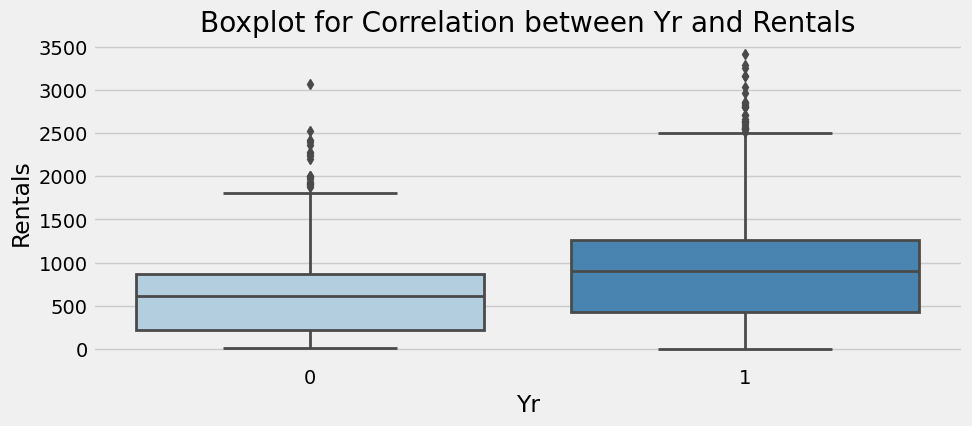

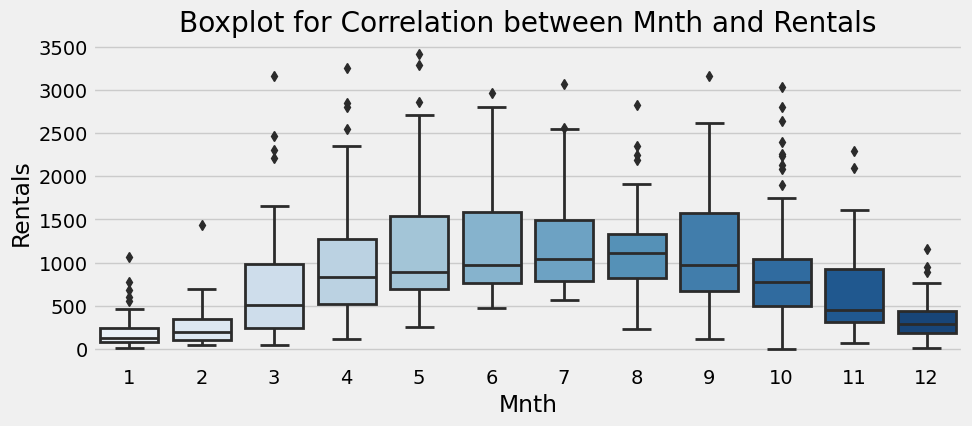

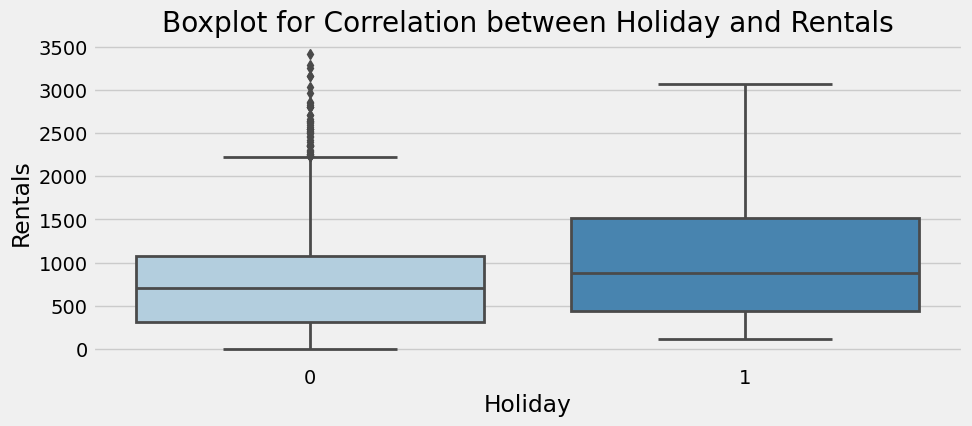

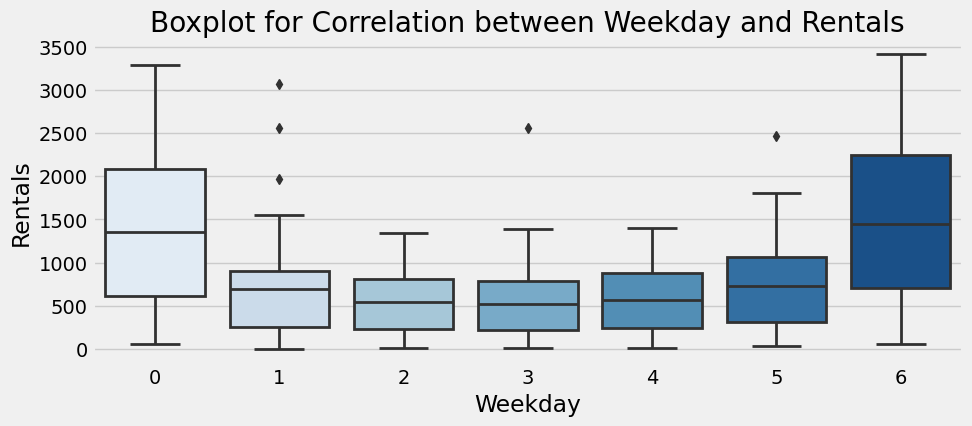

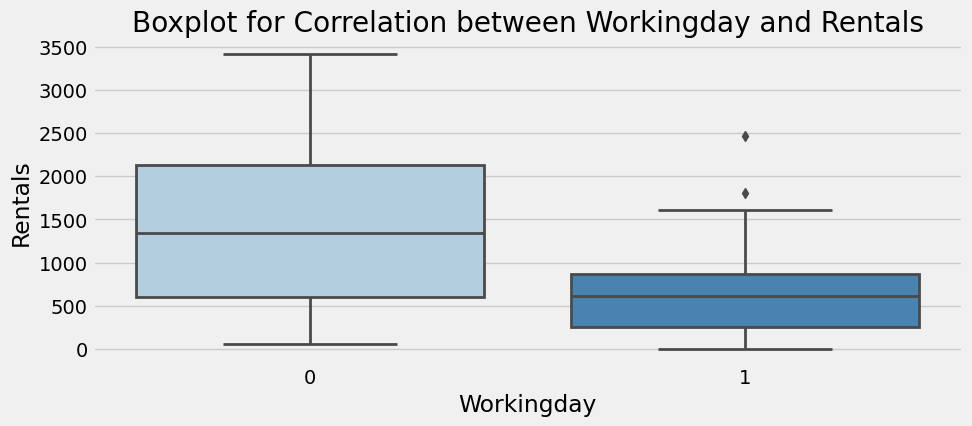

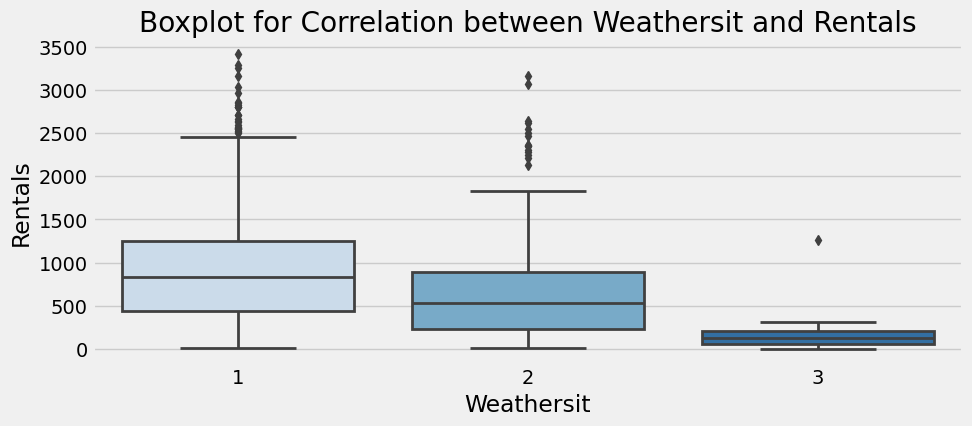

In [120]:
for var in cat_var:
    fig = tools.show_correlation_cat_with_target(data= bike_data, target='rentals', column=var)
    fig.show()

### Model Training

Now that we have taken a look at the features of our dataset we can train a regression model

In [121]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'rentals', 'day'],
      dtype='object')

In [124]:
# seaparate features and label

X, y = bike_data[[
    'season', 'yr', 'mnth', 'holiday', 'weekday',
    'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
]].values, bike_data[['rentals']].values

Sfter separating features from target it is common practice to establish a separation between a training set and a test/validation set

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

print(
f"""
Train size = {X_train.shape[0]}
Test_size = {X_test.shape[0]}
"""
)


Train size = 511
Test_size = 220



A common starting point for regression methods is to train a regression algorithm. This algorithm uses OLS (or Gradient Descent) in order to establish the best possible relationship between the features $X = (x_1, \dots, x_n)$ and the target value $y$

$$
y = f(X) = f(x_1, \dots, x_n) = \alpha_0 + \alpha_1 x_1 + \dots +\alpha_n x_n = \alpha_0 +\sum_{i=1}^{n}\alpha_i x_i
$$

conceptually speaking this function draws a line as a function of the parameters and given an input, the value assumed by this line at that input corresponds to the prediction.

In [126]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

print(model)

LinearRegression()


In [128]:
# now we can predict the values fot the test set

y_pred = model.predict(X_test)

Once the model is trained we can make evaluations of its performance

In [136]:
y_test = y_test.reshape(-1)
y_pred = y_pred.reshape(-1)

Text(0.5, 1.0, 'Regression Prediction vs Actual Values')

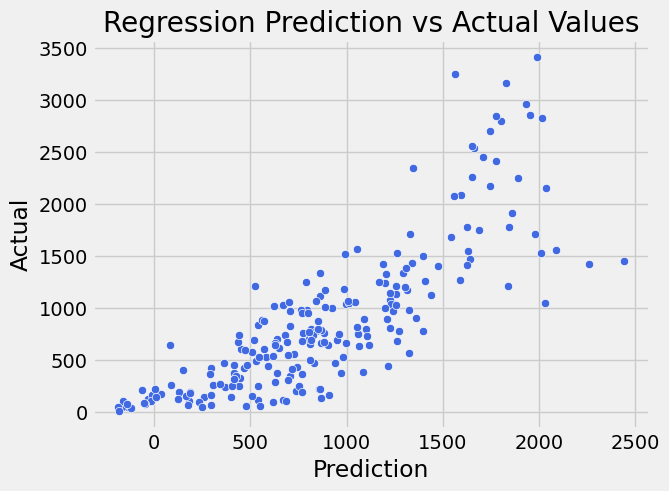

In [139]:
sns.scatterplot(
    x= y_pred,
    y= y_test,
    color= 'royalblue'
)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Regression Prediction vs Actual Values')

If the predictions were perfect we would observe the points on a straight line. Nevertheless there is positive correlations between the two sets

In [144]:
from scipy.stats.stats import pearsonr

corr = pearsonr(y_test, y_pred)
corr

PearsonRResult(statistic=0.8198221278124667, pvalue=1.0768355547961166e-54)

In [145]:
np.corrcoef(y_test, y_pred)

array([[1.        , 0.81982213],
       [0.81982213, 1.        ]])

we see that there is a 0.82 correlation coefficient between the value predicted and the actual value, which is indication of a good performance.

There are actually specific metrics that can be used to evaluate the performance. In the case of Regression Methods we use:

* Mean Square Error (MSE): Mean square of the differences between predicted and acutal values
 $$ \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$$

* Root Mean Square Error (RMSE): 
 $$\sqrt{\text{MSE}}$$

* $R^2$ :
  $$ R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_2)^2}{\sum_{i=1}^{n}(y_i - \bar{y}_2)^2}$$


In [148]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(
f"""Metrics:
MSE = {mse}
RMSE = {rmse}
R2 = {r2}
"""
)

Metrics:
MSE = 168177.78386090617
RMSE = 410.0948473961922
R2 = 0.6702980101910248

